## Table of Contents



1. Introduction


2. Loading Libraries


3. Data Loading


4. Handling Outliers


5. Uni-variate analysis.


6. Bi-variate analysis.

### Loading all the relevant libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline

### Loading Dataset
After loading dataset, i'm removing white-space with `_` from the column names.

In [2]:
train_df = pd.read_csv("train_data.csv")
train_df.columns = train_df.columns.str.replace(' ','_')

test_df = pd.read_csv("test_data.csv")
test_df.columns = test_df.columns.str.replace(' ','_')

Here i'm checking for (Both train and test set) the basic statistics present in the Dataset. Now, since we have only one numerical column viz. "Sourcing_Cost" hence, describe() is showing statistics for only one Column.

In [3]:
train_df.describe()

,Sourcing_Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [4]:
test_df.describe()

,Sourcing_Cost
count,96.000000
mean,106.208021
std,52.359484
min,4.140000
25%,59.662500
50%,117.245000
75%,144.915000
max,234.710000


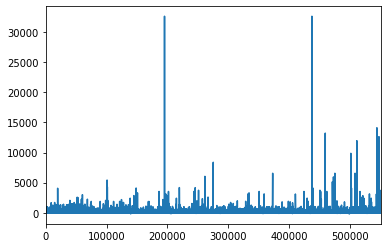

In [5]:
train_df['Sourcing_Cost'].plot.line()

2 Cells above i had observed that statistics showing some outliers. And therefore i have plotted the Sourcing_cost to get the pictorial view.

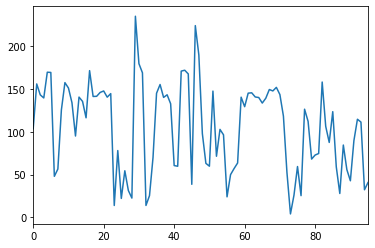

In [6]:
test_df['Sourcing_Cost'].plot.line()

In [7]:
mean = train_df['Sourcing_Cost'].mean()
std = train_df['Sourcing_Cost'].std()
train_df['Sourcing_Cost'] = np.where(train_df['Sourcing_Cost'] < 0, 
                                     abs(train_df['Sourcing_Cost']), train_df['Sourcing_Cost'])
train_df['Sourcing_Cost'] = np.where((train_df['Sourcing_Cost'] - mean).abs() > std, 
                                     mean, train_df['Sourcing_Cost'])

In the above cell i'm trying to get rid of the outliers. <br>
Now to get rid of outliers i applied two strategy:
* Strategy I - For all the negative entries, take there absolute values.
* Strategy II - For all the outliers viz. |val - mean| > std, i replaced them with mean values of the column.

#### After this step if we can check on some basic statistics then it'll be more or less same, in our training set and test set. 

`
Sourcing_Cost_Train
count	550176.000000
mean	109.229810
std	48.525341    
min	4.430000     {Minimum Value}
25%	66.480000    {25th Percentile}
50%	128.310000   {50th Percentile}
75%	144.660000   {75th Percentile}
max	212.980000   {Maximum Value}`  

`
Sourcing_Cost_Test
count	96.000000
mean	106.208021
std	52.359484
min	4.140000     {Minimum Value}
25%	59.662500    {25th Percentile}
50%	117.245000   {50th Percentile}
75%	144.915000   {75th Percentile}
max	234.710000   {Maximum Value}`

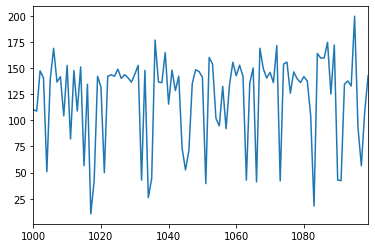

In [8]:
train_df['Sourcing_Cost'][1000:1100].plot.line()

In the above cell, i'm trying to get random 100 values plot from train set. And it seems that it is pretty much similar to test set plot. Hence, i assume that we're good for some feature engineering followed by EDA.

## Checking Number of unique values in each column.

In [9]:
def uniqVals(df):
    for i in df.columns.drop('Sourcing_Cost'):
        print("{0} has {1} unique values.".format(i, df[i].nunique()))

In [10]:
uniqVals(train_df)

ProductType has 3 unique values.
Manufacturer has 3 unique values.
Area_Code has 45 unique values.
Sourcing_Channel has 4 unique values.
Product_Size has 3 unique values.
Product_Type has 2 unique values.
Month_of_Sourcing has 11 unique values.


In [11]:
uniqVals(test_df)

ProductType has 3 unique values.
Manufacturer has 3 unique values.
Area_Code has 45 unique values.
Sourcing_Channel has 4 unique values.
Product_Size has 3 unique values.
Product_Type has 2 unique values.
Month_of_Sourcing has 1 unique values.


## Checking for unique value counts in each column.

In [12]:
def uniqValCounts(df):
    for i in df.columns.drop('Sourcing_Cost'):
        print("{0} has {1} unique values.".format(i, df[i].value_counts()))

In [13]:
uniqValCounts(train_df)

ProductType has NTM2    236726
NTM1    194923
NTM3    118527
Name: ProductType, dtype: int64 unique values.
Manufacturer has X1    419857
X2    120695
X3      9624
Name: Manufacturer, dtype: int64 unique values.
Area_Code has A28    41925
A7     36723
A3     33247
A11    31111
A8     28772
A44    26490
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15938
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4843
A34     4249
A19     3839
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: Area_Code, dtype: int64 unique values.
Sourcing_Channel has DIRECT       453617
RETAIL        60011
ECOM          31106
WHOLESALE      5442
Name: Sourcing_Channel, dtype: int64 unique

In [14]:
uniqValCounts(test_df)

ProductType has NTM2    42
NTM1    35
NTM3    19
Name: ProductType, dtype: int64 unique values.
Manufacturer has X1    76
X2    19
X3     1
Name: Manufacturer, dtype: int64 unique values.
Area_Code has A7     8
A28    6
A10    5
A8     5
A11    4
A2     4
A3     4
A44    3
A25    3
A29    3
A9     3
A32    3
A6     3
A18    2
A38    2
A35    2
A31    2
A45    2
A5     2
A42    2
A4     2
A21    2
A37    2
A16    1
A19    1
A22    1
A20    1
A12    1
A14    1
A26    1
A36    1
A46    1
A17    1
A15    1
A13    1
A24    1
A33    1
A40    1
A1     1
A41    1
A30    1
A34    1
A39    1
A23    1
A43    1
Name: Area_Code, dtype: int64 unique values.
Sourcing_Channel has DIRECT       71
RETAIL       13
ECOM          9
WHOLESALE     3
Name: Sourcing_Channel, dtype: int64 unique values.
Product_Size has Large         60
Small         35
ExtraLarge     1
Name: Product_Size, dtype: int64 unique values.
Product_Type has Powder    78
Liquid    18
Name: Product_Type, dtype: int64 unique values.
Mont

In the above cells, i'm trying to get the information of what else present inside my Dataset apart from Sourcing_cost.

### Univariate Analysis
In few of the below cells i'll try to do univariate anaysis which means i'll take one variable at a time and try to find if any pattern exist inside our Dataset.

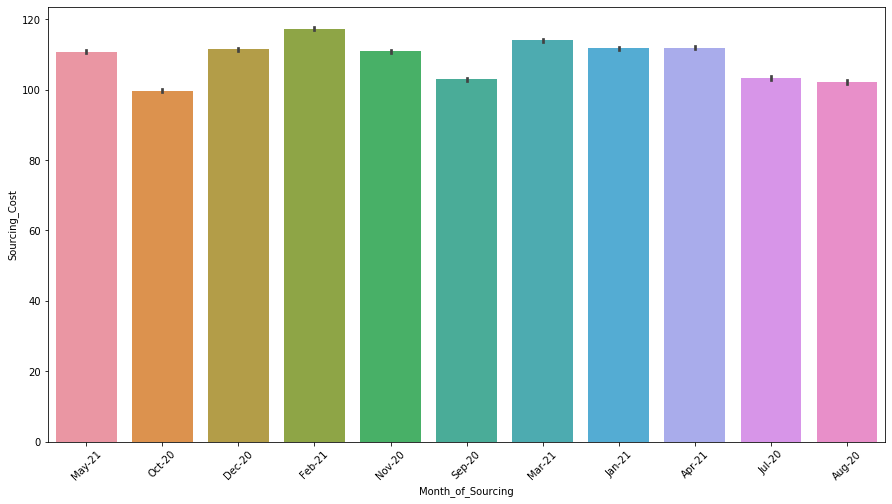

In [15]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Month_of_Sourcing', y = 'Sourcing_Cost', data=train_df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In the above cell, i'm trying to get the average sourcing cost for the past one year [Jul.20 - May.21] <br>
Here in, i'm not able to get much of the information because sourcing_cost seems in the range of [95-120]. But for few number of months the value is close to [100] or slightly [<100] this could be a possible reson of seasonality or any kind of sale or something. So, while doing Feature engineering, i'll try to capture that.

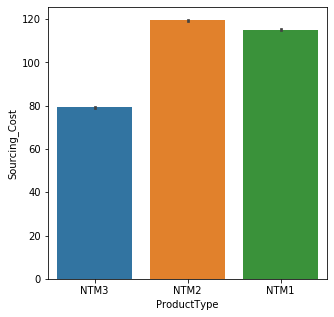

In [16]:
plt.figure(figsize = (5,5))
ax = sns.barplot(x='ProductType', y = 'Sourcing_Cost', data=train_df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.show()

In the above cell, i'm trying to get the average Sourcing_cost for each product type present. And it is clearly showing us that for [NTM2 and NTM1] the value is quite close, but for [NTM3] it decreases drastically to [~80]. <br>
So, i'll try to capture that while doing feature engineering.

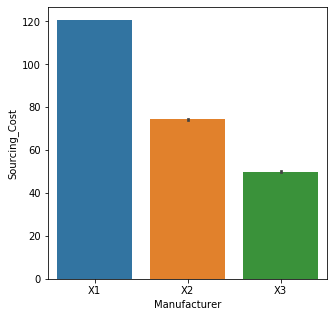

In [17]:
plt.figure(figsize = (5,5))
ax = sns.barplot(x='Manufacturer', y = 'Sourcing_Cost', data=train_df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.show()

In the above cell, i'm trying to get the average Sourcing_cost for each Manufacturer present. And it is clearly showing us that [X1 > X2 > X3] that means that [X3] having lowest Sourcing Cost on the other hand [X1] having highest Sourcing Cost. This coould be one of the most important features.
So, i'll try to capture this trend while doing feature engineering.

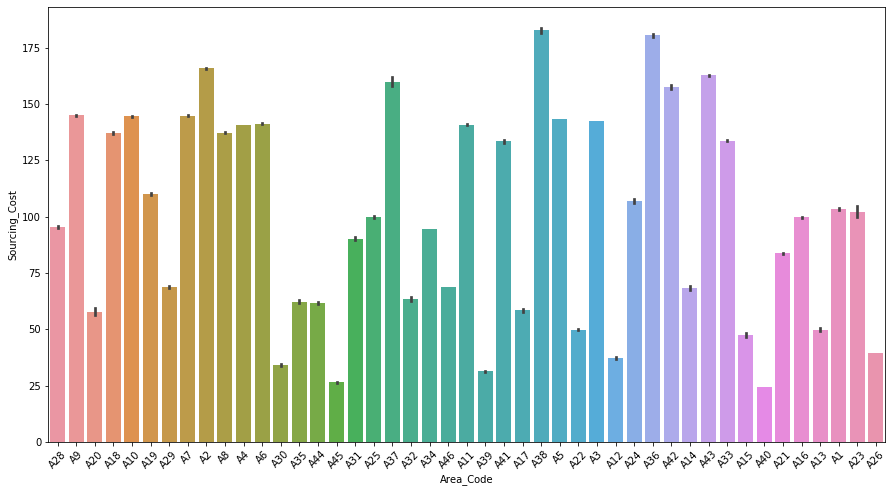

In [18]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Area_Code', y = 'Sourcing_Cost', data=train_df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In the above cell, i'm trying to get the average Sourcing_cost for each Area_Code present. Now, we have close to 45 area codes present. Hence, it's hard to differentiate. But from the above plot we can infer that roughly around [19-20] area codes having average sourcing cost [< 100]. Therefore, we must add this feature as well and keep on check later.

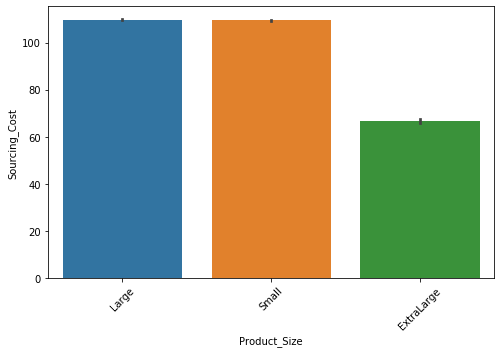

In [19]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x='Product_Size', y = 'Sourcing_Cost', data=train_df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In the above cell, i'm trying to get the average Sourcing_cost for each type of Product Size present. Now, we have 3 product size present. <br> Out of which two [L & S] are having very similar avg Sourcing Cost, whereas [XL] product size is on a little lower side.

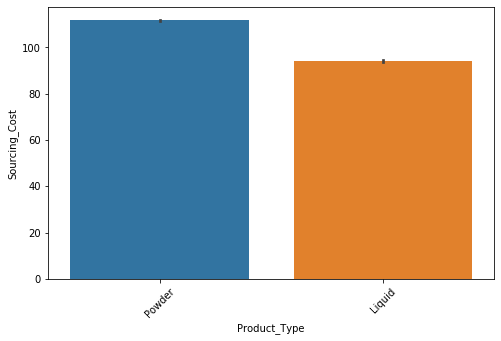

In [20]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x='Product_Type', y = 'Sourcing_Cost', data=train_df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In the above cell, i'm trying to get the average Sourcing_cost for each product category present. Liquid is little cheaper than powder products.

### Bi-variate Analysis
In few of the below cells i'll try to do bivariate anaysis which means i'll take more than one variable at a time and try to find if any pattern exist inside our Dataset.

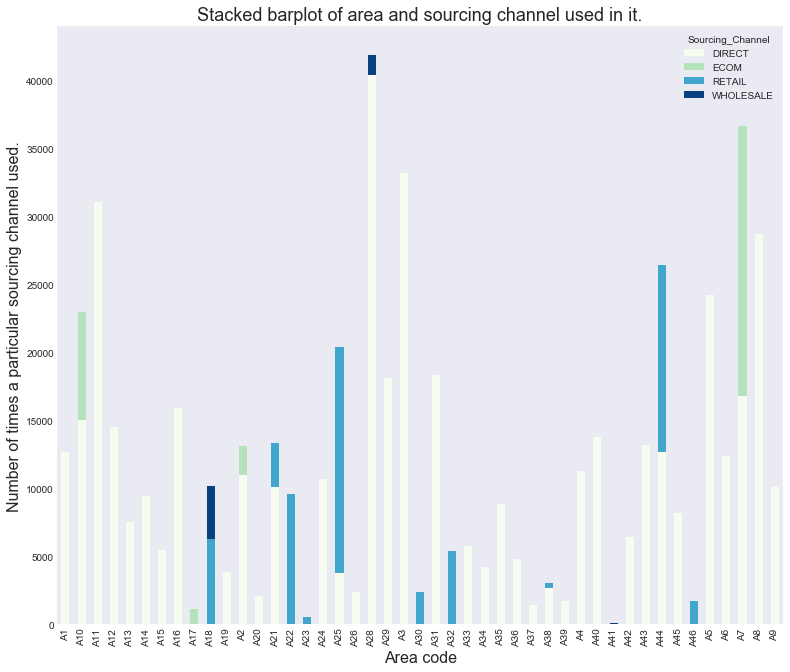

In [21]:
plt.style.use('seaborn-dark')
type_cluster = train_df.groupby(['Area_Code', 'Sourcing_Channel']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'GnBu', figsize=(13,11),  grid=False)
plt.title('Stacked barplot of area and sourcing channel used in it.', fontsize=18)
plt.ylabel('Number of times a particular sourcing channel used.', fontsize=16)
plt.xlabel('Area code', fontsize=16)
plt.show()

In the above cell, i'm trying to get Number of times a particular channel has been used. And we can see that only [DIRECT] sourcing channel is used in most of the area codes. This information should not be gone missing. Therefore, we'll try and create some feature using these 2.

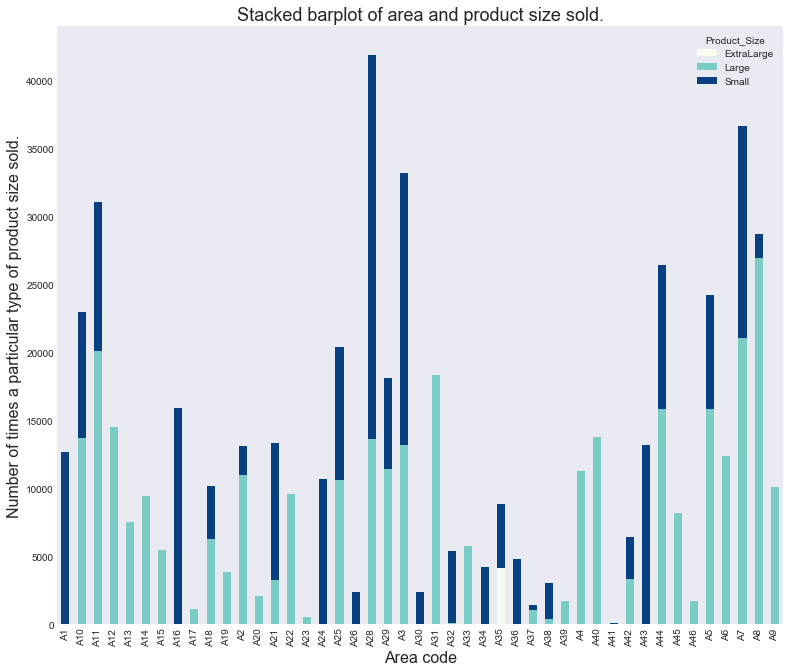

In [22]:
plt.style.use('seaborn-dark')
type_cluster = train_df.groupby(['Area_Code', 'Product_Size']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'GnBu', figsize=(13,11),  grid=False)
plt.title('Stacked barplot of area and product size sold.', fontsize=18)
plt.ylabel('Number of times a particular type of product size sold.', fontsize=16)
plt.xlabel('Area code', fontsize=16)
plt.show()

In the above cell, i'm trying to get Number of times a particular product size has been sold. And we can see that only [Large] has been used many times. Also in few of the area codes two product sizes are available. <br>
Also, only in one area code Extra Large is used.

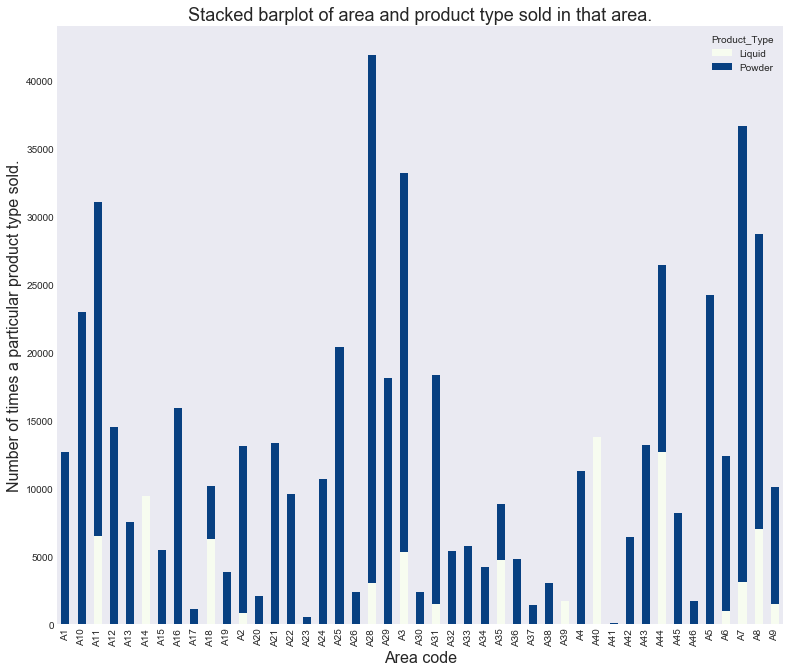

In [23]:
plt.style.use('seaborn-dark')
type_cluster = train_df.groupby(['Area_Code', 'Product_Type']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'GnBu', figsize=(13,11),  grid=False)
plt.title('Stacked barplot of area and product type sold in that area.', fontsize=18)
plt.ylabel('Number of times a particular product type sold.', fontsize=16)
plt.xlabel('Area code', fontsize=16)
plt.show()

In the above cell, i'm trying to get Number of times a particular product type has been sold. And we can see that only [Powder] has been sold many times. Also in few of the area codes only powder has been sold. <br>

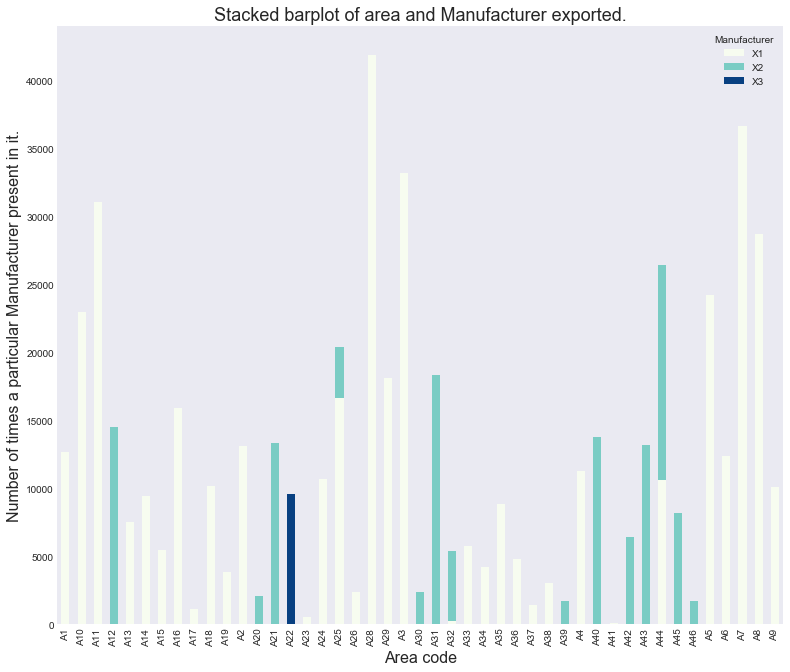

In [24]:
plt.style.use('seaborn-dark')
type_cluster = train_df.groupby(['Area_Code', 'Manufacturer']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'GnBu', figsize=(13,11),  grid=False)
plt.title('Stacked barplot of area and Manufacturer exported.', fontsize=18)
plt.ylabel('Number of times a particular Manufacturer present in it.', fontsize=16)
plt.xlabel('Area code', fontsize=16)
plt.show()

In the above cell, i'm trying to get the relationship between Manufacturer and Area code. In few area codes only [X2] manufacturer is there, in few area codes [X1] and manufacturer [X3] is present in only 1 area code. <br>
Almost 20+ area codes are having only one Manufacturer viz. [X1]